# Part II - Seasonal Analysis of English Premier League (EPL) Results
## by Teye Richard Gamah

## Investigation Overview


> The Analysis seeks to  understand Season level Analysis for football parameters - Matches, Wins, Goals(Home and Away) as well as what factors results in more goals: corners or shorts on target.


## Dataset Overview

> The dataset availabe is used to explore the English Premier League data, so as to understand how it has fared across different seasons and evolved over the years.

> There are 23 columns and 11113 entries from the dataset.

> NaN values would be removed as well as adding total columns for goals, shots on target and corners for further analysis

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('results.csv', encoding='windows-1252')

## Number of teams that play in each season

The seasons 1993-94 and 1994-95 seem to have 22 teams while the rest have only 20 teams.

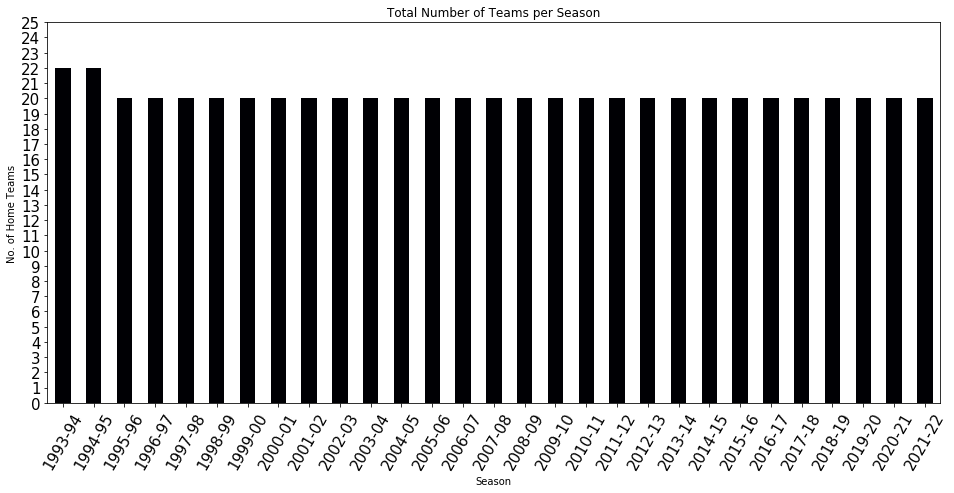

In [3]:
# Defining the total number of teams in each season
teams_per_season = df.groupby('Season')['HomeTeam'].nunique()

# Creating visualization for `Total Number of Teams per Season`
teams_per_season.plot(kind='bar',colormap='magma',fontsize=15,
                          figsize=(16,7),yticks=np.arange(0, 26))
plt.ylabel('No. of Home Teams')
plt.title("Total Number of Teams per Season")
plt.xticks(rotation=60);

## Teams that have played/appeared in each season

> Arsenal, Chelsea, Man United and Tottenham are the teams that have played in all the 29 seasons. On the other hand, Barnsley, Blackpool, Brentford, Oldham and Swindon played in only one season.

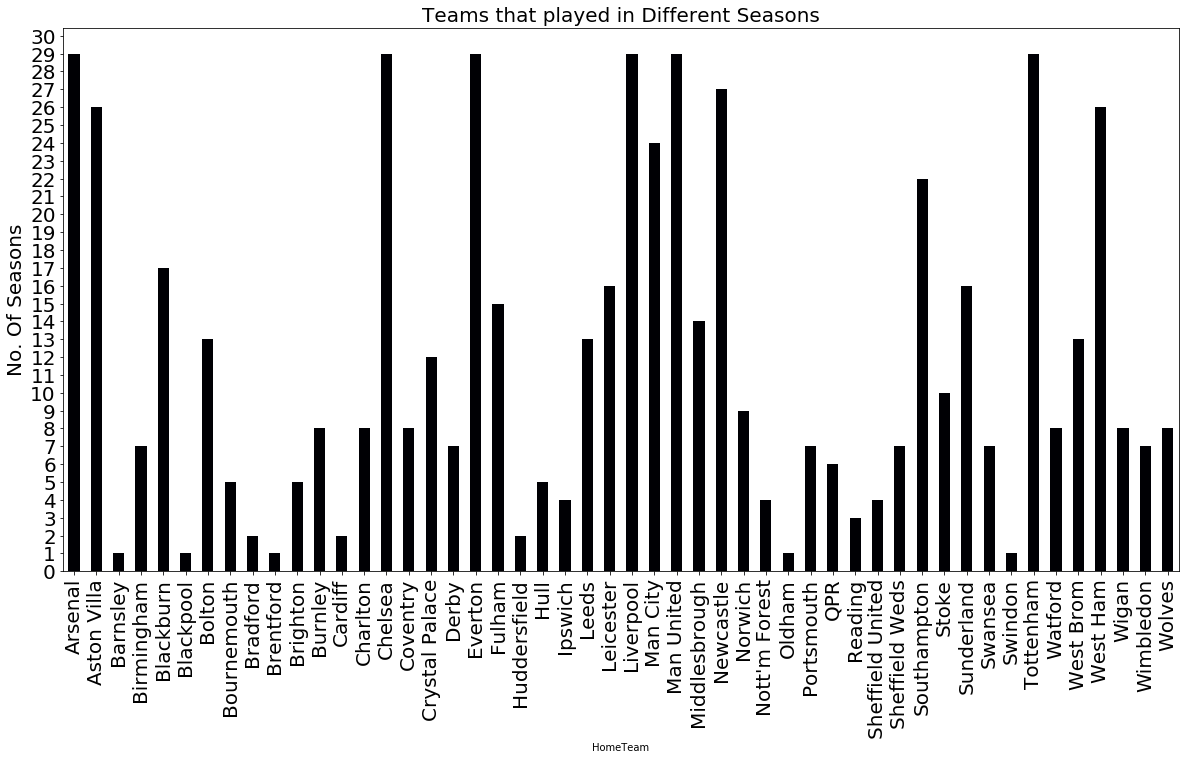

In [4]:
# Defining Teams that played in each season
team_appearances = df.groupby(['HomeTeam'])['Season'].nunique()

# Creating visualization for teams that appeared/played in all seasons
team_appearances.plot(kind='bar',figsize=(20,10), yticks=np.arange(0,31,1),
                      colormap='magma',fontsize=20)
plt.ylabel("No. Of Seasons",fontsize=20)
plt.xticks(rotation=90)
plt.title("Teams that played in Different Seasons",fontsize=20);

## Home VS Away goals

> There is usually a large differences in number of Home and Away goals in all the seasons, even 2020-21 season having the least difference, comes with 4 goal differences in Home goals against Away goals.

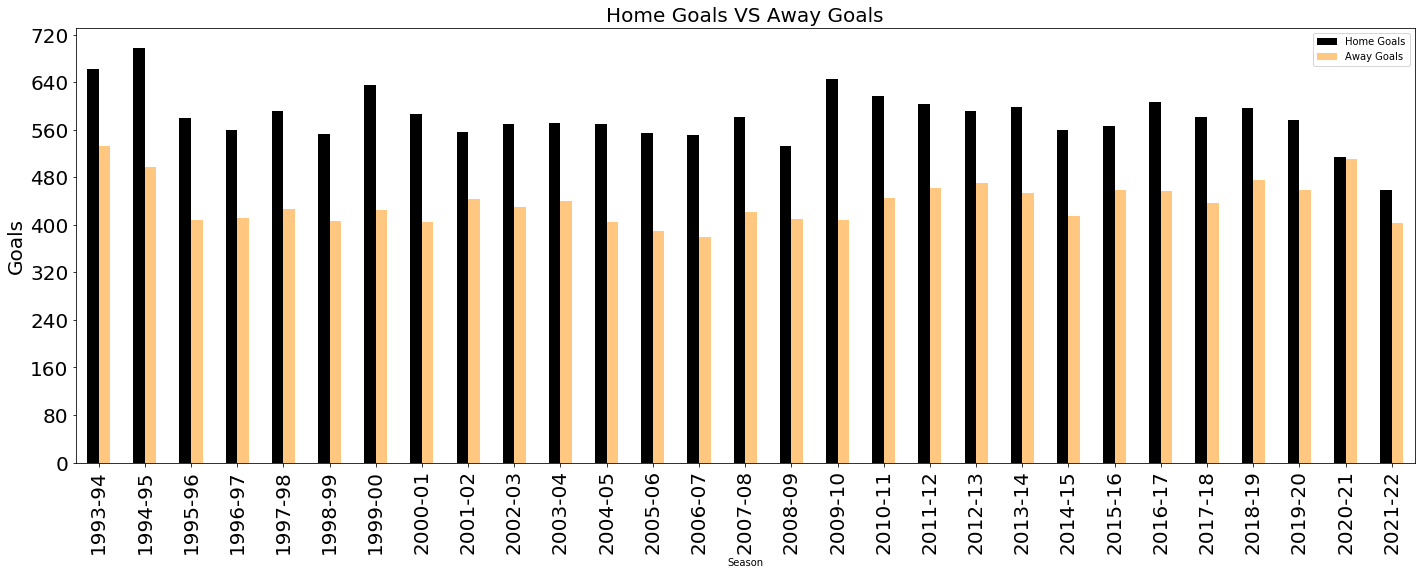

In [5]:
# Defining Home VS Away goals
home_vs_away_goals = df.groupby('Season')[['FTHG','FTAG']].sum()

# Creating visualization for Home Goals VS Away Goals
home_vs_away_goals.plot(kind='bar', figsize=(24,8),yticks=np.arange(0,721,80), 
                       colormap='copper', fontsize=20)
plt.ylabel('Goals', fontsize=20)
plt.legend(['Home Goals','Away Goals'])
plt.title("Home Goals VS Away Goals",fontsize=20)
plt.xticks(rotation=90);

## The correlation among Total Goals, Total Corners and Total Shots on Target

> There is indeed a negative correlation between Total Goals Scored and Total Corner, while there is a positive, yet not a steady correlation between Total Shots on Target and Total Goals as well as Total Shots on Target and Total Corners.

In [6]:
# Dropping NaN values
df = df.dropna()
df = df.reset_index(drop = True)
df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4,0,H,2.0,0.0,H,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,2000-01,2000-08-19T00:00:00Z,Chelsea,West Ham,4,2,H,1.0,0.0,H,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,2000-01,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,2000-01,2000-08-19T00:00:00Z,Derby,Southampton,2,2,D,1.0,2.0,A,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,2000-01,2000-08-19T00:00:00Z,Leeds,Everton,2,0,H,2.0,0.0,H,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


In [7]:
# Dropping columns that are not needed
df.drop(['DateTime', 'Referee', 'HF','AF', 'HY', 'AY', 'HR', 'AR'], axis=1, inplace=True)
df.columns

Index(['Season', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC'],
      dtype='object')

In [8]:
# Creating `TotalCorners` and `TotalShotTarget` columns
df['TotalGoals'] = df['FTHG'] + df['FTAG']
df['TotalCorners'] = df['HC'] + df['AC']
df['TotalShotTarget'] = df['HST'] + df['AST']
df.head()

,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HC,AC,TotalGoals,TotalCorners,TotalShotTarget
0,2000-01,Charlton,Man City,4,0,H,2.0,0.0,H,17.0,8.0,14.0,4.0,6.0,6.0,4,12.0,18.0
1,2000-01,Chelsea,West Ham,4,2,H,1.0,0.0,H,17.0,12.0,10.0,5.0,7.0,7.0,6,14.0,15.0
2,2000-01,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,6.0,16.0,3.0,9.0,8.0,4.0,4,12.0,12.0
3,2000-01,Derby,Southampton,2,2,D,1.0,2.0,A,6.0,13.0,4.0,6.0,5.0,8.0,4,13.0,10.0
4,2000-01,Leeds,Everton,2,0,H,2.0,0.0,H,17.0,12.0,8.0,6.0,6.0,4.0,2,10.0,14.0


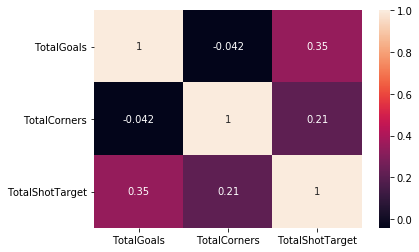

In [9]:
f = (
    df.loc[:, ['TotalGoals', 'TotalCorners', 'TotalShotTarget']]
).corr()

sb.heatmap(f, annot=True)
sb.set(font_scale=2.0)
plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 497076 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/